In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example

In [3]:
BOARD_SIZE=15
filename = "the_heuristic_fourty.pickle"
examples = read_training_data(filename, BOARD_SIZE)
len(examples), len(examples[0]), examples[0][0].shape

(8288, 3, (17, 17, 3))

---
### Data Verification
We have 8288 records from 40 games in 8 symmetries. Now we skim through a good chunk of training records to check whether it makes sense (to some degree).

In [4]:
i = 0

Next to play: BLACK
Value from BLACK's point of view: 0.00125121859654844


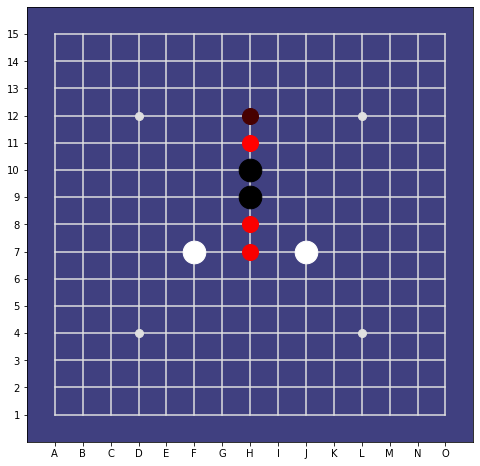

In [11]:
import random

analyse_example(BOARD_SIZE, examples[random.randint(0, 8288)])

In [12]:
from aegomoku.gomoku_model import NeuralNetAdapter

the_model = NeuralNetAdapter(BOARD_SIZE + 2)
the_model.policy.summary()
the_model.policy.compile()

Model: "gomoku_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 initial (Conv2D)            multiple                  11648     
                                                                 
 potential_0 (Conv2D)        multiple                  123936    
                                                                 
 potential_1 (Conv2D)        multiple                  123936    
                                                                 
 potential_2 (Conv2D)        multiple                  123936    
                                                                 
 potential_3 (Conv2D)        multiple                  123936    
                                                                 
 potential_4 (Conv2D)        multiple                  123936    
                                                                 
 policy_aggregator (Conv2D)  multiple                 

2022-08-05 22:36:16.550744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
sample = np.expand_dims(examples[55][0], axis=0).astype(float)
print(sample.shape)
the_model.policy(sample)

(1, 17, 17, 3)


(<tf.Tensor: shape=(1, 225), dtype=float32, numpy=
 array([[0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00449057,
         0.00456503, 0.00447135, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00460816, 0.00443309,
         0.0046708 , 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443309, 0.00443309,
         0.00443309, 0.00443309, 0.00443309, 0.00443

In [57]:
the_model.train(examples[:200], epochs_per_train=400, report_every=10)

Epoch: 1, Loss: 1.2848254442214966
Epoch: 11, Loss: 1.2669261693954468
Epoch: 21, Loss: 1.2598258256912231
Epoch: 31, Loss: 1.256971001625061
Epoch: 41, Loss: 1.2518205642700195
Epoch: 51, Loss: 1.2530558109283447
Epoch: 61, Loss: 1.251257061958313
Epoch: 71, Loss: 1.2502696514129639
Epoch: 81, Loss: 1.2505830526351929
Epoch: 91, Loss: 1.2504948377609253
Epoch: 101, Loss: 1.2498992681503296
Epoch: 111, Loss: 1.2459897994995117
Epoch: 121, Loss: 1.2425278425216675
Epoch: 131, Loss: 1.239314079284668
Epoch: 141, Loss: 1.2387075424194336
Epoch: 151, Loss: 1.236981987953186
Epoch: 161, Loss: 1.2356959581375122
Epoch: 171, Loss: 1.2348021268844604
Epoch: 181, Loss: 1.2333331108093262
Epoch: 191, Loss: 1.2323907613754272
Epoch: 201, Loss: 1.2305434942245483



KeyboardInterrupt



(1, 17, 17, 3)
n=360
Next to play: BLACK
Value from BLACK's point of view: 0.05641575883880673
value = 0.05641575883880673
Next to play: BLACK
Value from BLACK's point of view: [[0.04328685]]
value = [[0.04328685]]


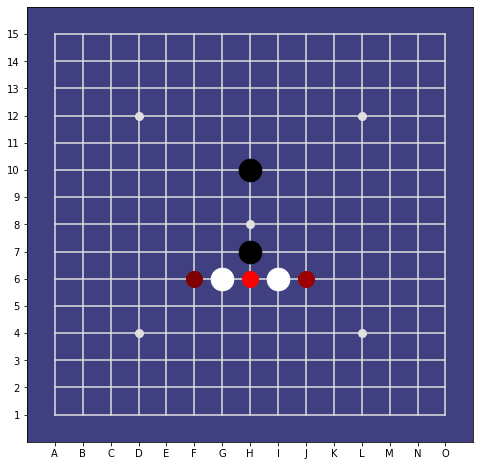

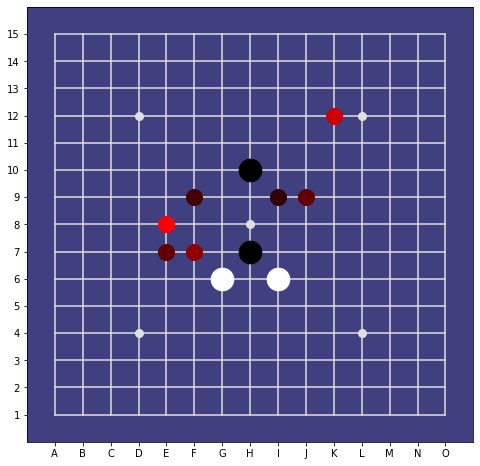

In [56]:
n = random.randint(0, 400)
sample = np.expand_dims(examples[n][0], axis=0).astype(float)
print(sample.shape)
p_, v_ = the_model.policy(sample)
s, p, v = examples[n]
example = (s, list(p_.numpy()), v_)
print(f"n={n}")
analyse_example(BOARD_SIZE, examples[n])
print(f"value = {v}")
analyse_example(BOARD_SIZE, example)
print(f"value = {v_}")